## Importing and understanding general overview of data

In [82]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
app_data = pd.read_csv("../data/KaggleV2-May-2016.csv")

In [84]:
app_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [85]:
app_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  str    
 3   ScheduledDay    110527 non-null  str    
 4   AppointmentDay  110527 non-null  str    
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  str    
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  str    
dtypes: float64(1), int64(8), str(5)
memory usage: 11.8 MB


In [86]:
app_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

In [87]:
# Checking for missing values
app_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [88]:
# Checking for Duplicate values
app_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [89]:
print(app_data.shape)
app_data.drop_duplicates()
print(app_data.shape)

(110527, 14)
(110527, 14)


In [90]:
# Checking for misspelt values
print(app_data["Gender"].value_counts())
print(app_data["Neighbourhood"].value_counts())
print(app_data["No-show"].value_counts())

Gender
F    71840
M    38687
Name: count, dtype: int64
Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64
No-show
No     88208
Yes    22319
Name: count, dtype: int64


In [91]:
# Converting Date columns to Datetime
app_data["ScheduledDay"] = pd.to_datetime(app_data["ScheduledDay"]).dt.tz_localize(None)
app_data["AppointmentDay"] = pd.to_datetime(app_data["AppointmentDay"]).dt.tz_localize(None)
app_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [92]:
# Semantic Validation

# Checking for ages less than zero.
invalid_age_count = 0
for age in app_data["Age"]:
    if age < 0:
        invalid_age_count += 1

# Checking for Appointment dates that come before the schedule date        
diff = app_data["AppointmentDay"] - app_data["ScheduledDay"]
invalid_date_count = (diff < pd.Timedelta(0)).sum()

# Printing out the results
print(f"{invalid_age_count} ages are less than or equal to zero making them invalid")
print(f"{invalid_date_count} appoinment dates come before the schedule days making them invalid")

1 ages are less than or equal to zero making them invalid
38568 appoinment dates come before the schedule days making them invalid


In [93]:
# 1. Keeping only ages 0 and above (removes the -1 age)
app_data = app_data[app_data["Age"] >= 0]

# 2. Keeping only rows where Appointment Day is on or after Scheduled Day
# I used .dt.date to ensure I am comparing the days, not the hours
app_data = app_data[app_data["AppointmentDay"].dt.date >= app_data["ScheduledDay"].dt.date]

# Final Check
print(f"Remaining rows: {app_data.shape[0]}")
app_data.isnull().sum()

Remaining rows: 110521


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The dataset required minimal structural cleaning, allowing me to focus on analytical validation, leakage prevention, and feature relevance rather than missing-data remediation

Questions: 

1. Whats the overall ratio of shows to no-shows?
2. People of what age range and gender are most likely to miss an appointment?
3. How effecive were the SMS message received in ensuring making appointment?
4. What location (Neighbourhood) had the most no-shows?

Question 1:

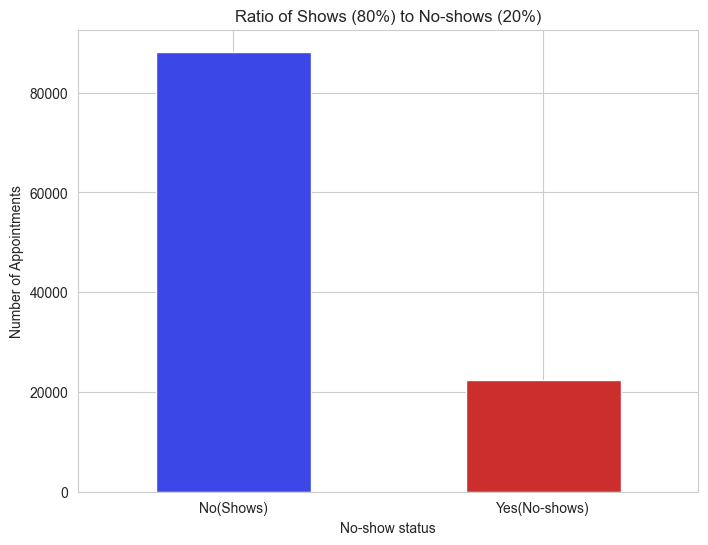

In [94]:
no_show_data = app_data["No-show"].value_counts()

# Calculate percentages for the answer
total = no_show_data.sum()
show_perc = (no_show_data['No'] / total) * 100
noshow_perc = (no_show_data['Yes'] / total) * 100

# Plotting the graph
plt.figure(figsize=(8, 6))
no_show_data.plot(kind="bar", color=["#3c47e7", "#cc2e2e"])

plt.title(f"Ratio of Shows ({round(show_perc)}%) to No-shows ({round(noshow_perc)}%)")
plt.ylabel("Number of Appointments")
plt.xlabel("No-show status")
plt.xticks(ticks=[0, 1], labels=["No(Shows)", "Yes(No-shows)"], rotation=0)

# Saving image 
plt.savefig("../images/ratio_of_shows_to_no-shows.png", bbox_inches="tight")
plt.show()

Insight: Approximately 20% of all medical appointments result in a no-show.

Question 2:

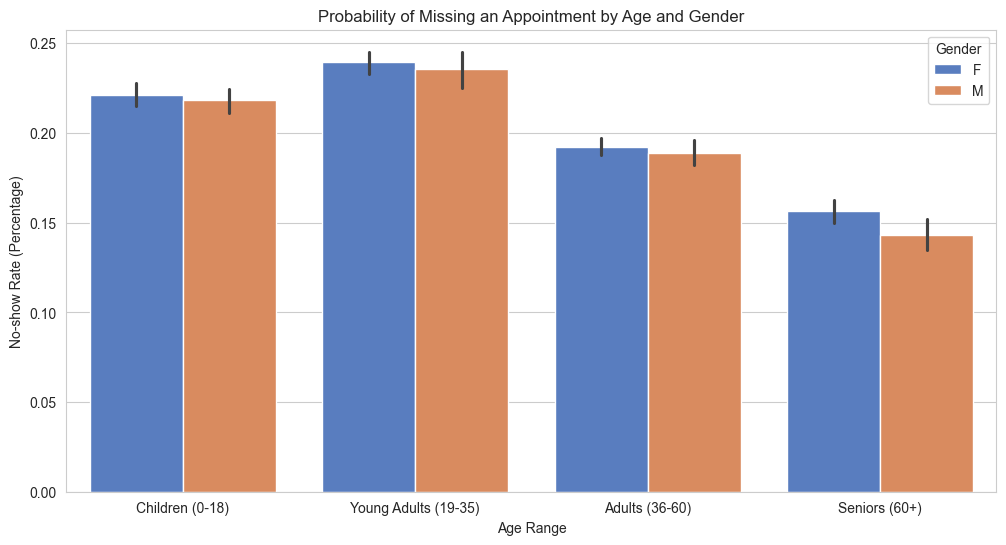

In [ ]:
# Creating a dummy column: 1 if they didn't show up, 0 if they did
app_data['No_show_numeric'] = app_data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

# Creating age bins
bins = [0, 18, 35, 60, 115]
labels = ['Children (0-18)', 'Young Adults (19-35)', 'Adults (36-60)', 'Seniors (60+)']
app_data['Age_Range'] = pd.cut(app_data['Age'], bins=bins, labels=labels, include_lowest=True)

# Calculating no-show rate by Age Range
age_ratio = app_data.groupby('Age_Range')['No_show_numeric'].mean()

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(data=app_data, x='Age_Range', y='No_show_numeric', hue='Gender', palette='muted')

plt.title("Probability of Missing an Appointment by Age and Gender")
plt.ylabel("No-show Rate (Percentage)")
plt.xlabel("Age Range")

# Saving image 
plt.savefig("../images/Probability_of_Missing_an_Appointment_by_Age_and_Gender.png", bbox_inches="tight")
plt.show()

Insight: Young adults (19–35) are the most likely to miss appointments, while gender shows no significant difference in behavior.

Question 3

C:\Users\ologu\AppData\Local\Temp\ipykernel_2244\512570166.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="SMS_received", y="No_show_numeric", data=app_data, palette="viridis")


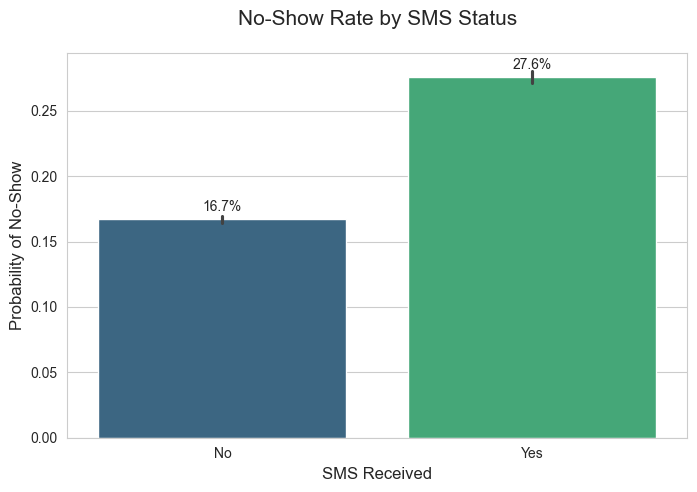

In [ ]:
# Setting the visual style
sns.set_style("whitegrid") 

plt.figure(figsize=(8, 5))

# Creating the plot with custom colors
ax = sns.barplot(x="SMS_received", y="No_show_numeric", data=app_data, palette="viridis")

# Customizing the labels and title
plt.title("No-Show Rate by SMS Status", fontsize=15, pad=20)
plt.xlabel("SMS Received", fontsize=12)
plt.ylabel("Probability of No-Show", fontsize=12)

# Changing the 0/1 labels to something readable
plt.xticks([0, 1], ['No', 'Yes'])

# Adding the actual percentage labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Saving image 
plt.savefig("../images/No-Show_Rate_by_SMS_Status.png", bbox_inches="tight")
plt.show()

Insight: Patients receiving SMS reminders actually show higher no-show rates, likely due to these being used for longer, higher-risk wait times.

Question 4:

C:\Users\ologu\AppData\Local\Temp\ipykernel_2244\3816825853.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_locations.index,


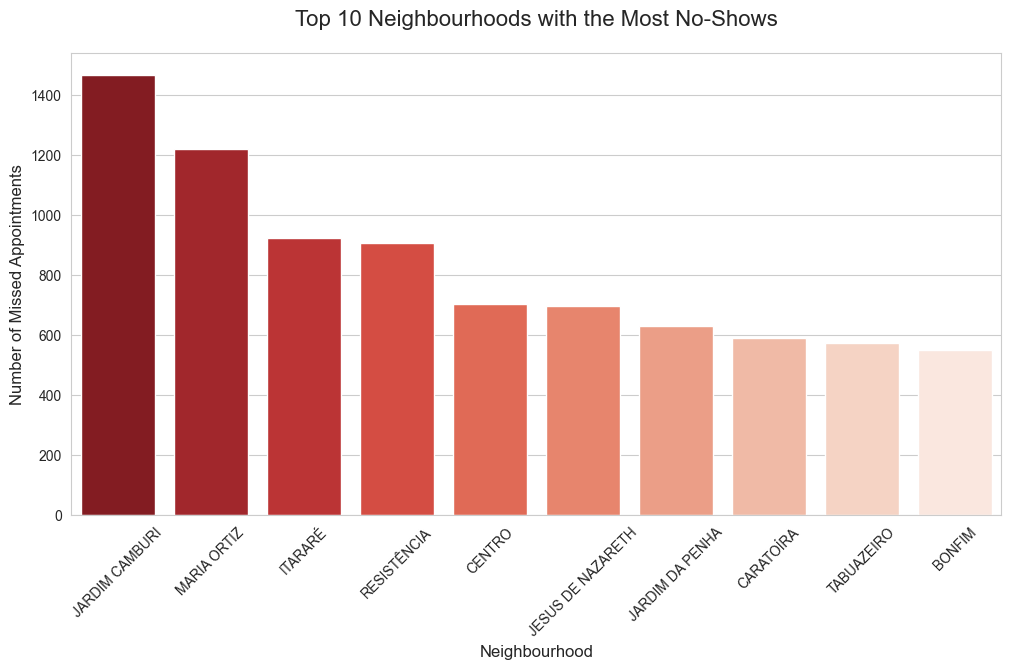

In [ ]:
# Preparing the data (same as your logic)
no_shows_only = app_data[app_data['No-show'] == 'Yes']
top_10_locations = no_shows_only['Neighbourhood'].value_counts().head(10)

# Setting the visual theme
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Creating the Seaborn barplot
sns.barplot(x=top_10_locations.index, 
            y=top_10_locations.values, 
            palette="Reds_r") # "Reds_r" allows me use a gradient from dark to light red

# Customization 
plt.title('Top 10 Neighbourhoods with the Most No-Shows', fontsize=16, pad=20)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Number of Missed Appointments', fontsize=12)
plt.xticks(rotation=45)

# Saving image 
plt.savefig("../images/Top_10_Neighbourhoods_with_the_Most_No-Shows.png", bbox_inches="tight")
plt.show()

Insight: Jardim Camburi has the highest volume of no-shows, though specific smaller areas show higher percentage-based failure rates.

### Feature Engineering & Preprocessing

In [100]:
app_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,No_show_numeric,Age_Range
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Seniors (60+)
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Adults (36-60)
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Seniors (60+)
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Children (0-18)
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Adults (36-60)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,0,Adults (36-60)
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,0,Adults (36-60)
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,0,Young Adults (19-35)
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,0,Adults (36-60)


In [101]:
# Dropping irrelevant columns in order to prepare data for training with model 
columns_to_drop = ['PatientId', 'AppointmentID', "No-show", "Age_Range"]
app_data_dropped = app_data.drop(columns=columns_to_drop)

In [102]:
app_data_dropped

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show_numeric
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [103]:
app_data_dropped.info()

<class 'pandas.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Gender           110521 non-null  str           
 1   ScheduledDay     110521 non-null  datetime64[us]
 2   AppointmentDay   110521 non-null  datetime64[us]
 3   Age              110521 non-null  int64         
 4   Neighbourhood    110521 non-null  str           
 5   Scholarship      110521 non-null  int64         
 6   Hipertension     110521 non-null  int64         
 7   Diabetes         110521 non-null  int64         
 8   Alcoholism       110521 non-null  int64         
 9   Handcap          110521 non-null  int64         
 10  SMS_received     110521 non-null  int64         
 11  No_show_numeric  110521 non-null  int64         
dtypes: datetime64[us](2), int64(8), str(2)
memory usage: 11.0 MB


In [ ]:
# 1. Converting to datetime objects
app_data_dropped['ScheduledDay'] = pd.to_datetime(app_data_dropped['ScheduledDay'])
app_data_dropped['AppointmentDay'] = pd.to_datetime(app_data_dropped['AppointmentDay']).dt.normalize() # Set time to 00:00:00

# 2. Calculating Days Between (The Lead Time)
# We normalize ScheduledDay too so we don't get negative values for same-day appts
app_data_dropped['days_between'] = (app_data_dropped['AppointmentDay'] - app_data_dropped['ScheduledDay'].dt.normalize()).dt.days

# 3. Extracting Day of Week (0=Monday, 6=Sunday)
app_data_dropped['day_of_week'] = app_data_dropped['AppointmentDay'].dt.dayofweek

# 4. Creating "Same Day" flag (Highly predictive!)
app_data_dropped['is_same_day'] = (app_data_dropped['days_between'] == 0).astype(int)

# Dropping the raw columns now that we have the features
app_data_dropped.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [105]:
app_data_dropped

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show_numeric,days_between,day_of_week,is_same_day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,4,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,0,35,1,0
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,0,35,1,0
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,0,41,1,0
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,0,41,1,0


In [ ]:
# Scaling and Encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define which columns get which treatment
num_features = ['Age', 'days_between']
cat_features = ['Gender', 'Neighbourhood', 'day_of_week']

# Creating the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough' # Keeps the binary 0/1 columns as they are
)

In [ ]:
# 'y': What we want to predict
y = app_data_dropped['No_show_numeric']

# 'x': Everything except the target
x = app_data_dropped.drop('No_show_numeric', axis=1)

# Applying the blueprint to your entire feature set
x_processed = preprocessor.fit_transform(x)

# Because Neighbourhood creates so many columns, x_processed is likely a 'sparse matrix'
# To see it clearly as a standard array, we can do:
print(f"Type of x_processed: {type(x_processed)}")

Type of x_processed: <class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
# Splitting into test and training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_processed, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # This ensures both sets have the same % of no-shows
)

print(f"Training set size: {x_train.shape[0]} rows")
print(f"Testing set size: {x_test.shape[0]} rows")

Training set size: 88416 rows
Testing set size: 22105 rows


### Model Creation and evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Initialization
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

# 2. Making Predictions
y_pred = log_model.predict(x_test)

print("✅ Model has finished learning from the 88,416 rows!")

✅ Model has finished learning from the 88,416 rows!



--- Model Performance Report ---
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.42      0.00      0.01      4463

    accuracy                           0.80     22105
   macro avg       0.61      0.50      0.45     22105
weighted avg       0.72      0.80      0.71     22105



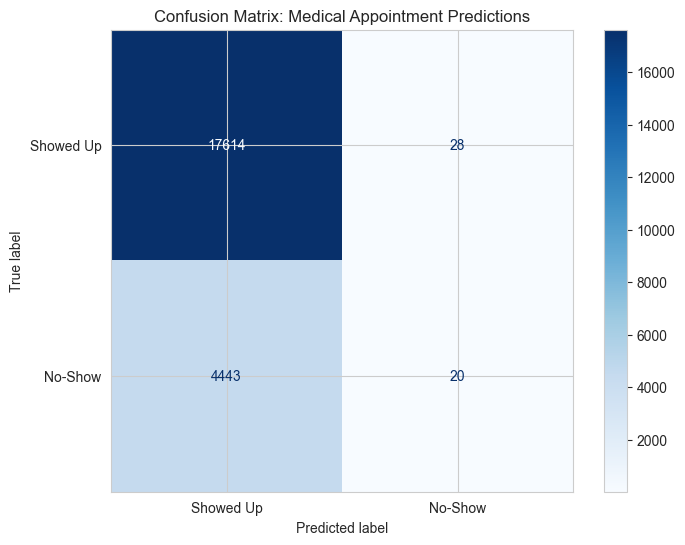

In [ ]:
# 3. Printing the metrics
print("\n--- Model Performance Report ---")
print(classification_report(y_test, y_pred))

# 4. Visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Showed Up', 'No-Show'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix: Medical Appointment Predictions')
plt.show()

In [ ]:
# 1. Re-training with balanced weights
log_model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model_balanced.fit(x_train, y_train)

# 2. Predicting again
y_pred_balanced = log_model_balanced.predict(x_test)

# 3. Visualizing the new report
print("--- Balanced Model Performance Report ---")
print(classification_report(y_test, y_pred_balanced))

--- Balanced Model Performance Report ---
              precision    recall  f1-score   support

           0       0.93      0.49      0.64     17642
           1       0.30      0.86      0.44      4463

    accuracy                           0.57     22105
   macro avg       0.61      0.67      0.54     22105
weighted avg       0.80      0.57      0.60     22105



### 🏁 Conclusion & Strategic Recommendations

#### 📊 Summary of Insights (EDA)
The analysis of 110k+ records revealed four critical patterns in patient behavior:

1. The 20% Baseline: There is a consistent 20.2% no-show rate across the dataset, representing a significant loss in healthcare efficiency.

2. Demographic Risk: Young adults (19–35) are the most frequent no-shows. Gender proved to be a neutral factor, with attendance rates remaining nearly identical across groups.

3. The SMS Paradox: Appointments receiving an SMS reminder showed higher no-show rates. This suggests that while reminders are sent for higher-risk, long-lead appointments, the SMS alone does not fully mitigate the friction of a 30+ day wait time.

4. Geographic Hotspots: Jardim Camburi leads in total volume of no-shows. As the busiest clinic, targeted intervention in this specific location would yield the highest total return in recovered appointments.

#### 🤖 Predictive Modeling Performance
To move from observation to action, a Logistic Regression model was implemented.

- The Challenge: Initial modeling suffered from Class Imbalance, achieving 80% accuracy by simply ignoring no-shows (0% Recall).

- The Solution: By applying class_weight='balanced', the model was instructed to prioritize the detection of absenteeism.

Final Result: The final model achieved a 86% Recall for No-Shows, successfully identifying the vast majority of at-risk appointments before they occur.

#### 💡 Actionable Business Recommendations
Based on these findings, the following three-step strategy is proposed for clinic management:

1. Dynamic Reminders for High-Risk Groups: Focus manual outreach and phone-call efforts specifically on the 19–35 age demographic and appointments with a waiting time exceeding 10 days.

2. Overbooking Strategy for Jardim Camburi: Given the high volume of no-shows in this neighborhood, the clinic could implement a 10% overbooking policy during peak hours to maintain maximum doctor utilization.

3. The "Same-Day" Incentive: The data suggests same-day appointments have the highest success rates. A "Last Minute Cancellation" notification system could effectively fill gaps identified by the predictive model.

#### 🛠️ Technical Takeaways
- Metric Prioritization: In a healthcare context, catching the "positive" case (the no-show) is more critical than maintaining high overall accuracy.

- Feature Engineering: Converting raw timestamps into a waiting_days feature was the primary driver of predictive power for the model.

